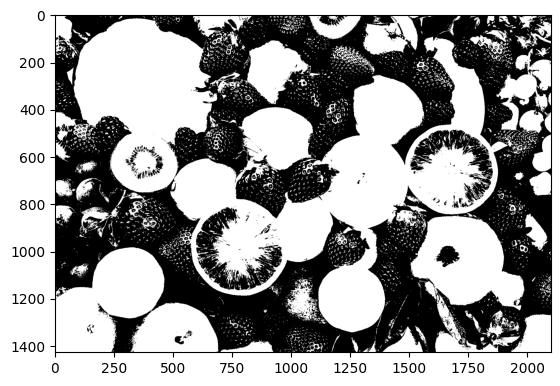

In [1]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('fruit.jpg').convert('L')

a = np.asanyarray(data)

# perfroming Otsu's thresholding
thres = threshold_otsu(a)

# pixels with intensity greater than theshold are kept
b= a > thres

b = Image.fromarray(b)

plt.imshow(b)
plt.show()

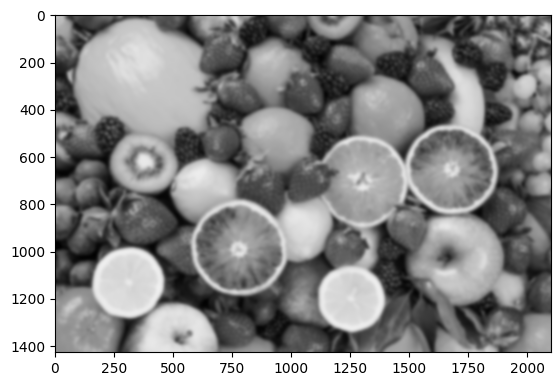

In [2]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('fruit.jpg').convert('L')

a = np.asarray(data)

# performing local thresholding
b = threshold_local(a, 39, offset=10)

b = Image.fromarray(b)

plt.imshow(b)
plt.show()

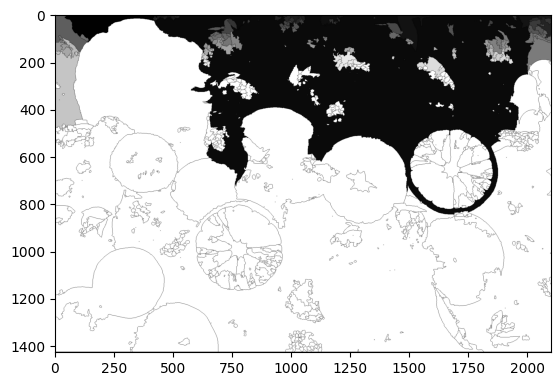

In [5]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

#opening the image and coverting it to grayscale
data = cv2.imread('fruit.jpg')
# coverting image from color to grayscale
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
# thresholding the image to obtain cell pixels
thresh, b = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# since Otsu's method has over segmented the image
# erosion operation is performed
b2 = cv2.erode(b, None, iterations = 2)
#distance transform is performed
dist_trans = cv2.distanceTransform(b2, 2, 3)
# thresholding the distance transform image to obtain
# pixels that are foreground
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)
# performing labeling
labelled, ncc = label(dt)
# labelled is converted to 32-bit integer
labelled = labelled.astype(np.int32)
# performing watershed
cv2.watershed(data, labelled)
b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()

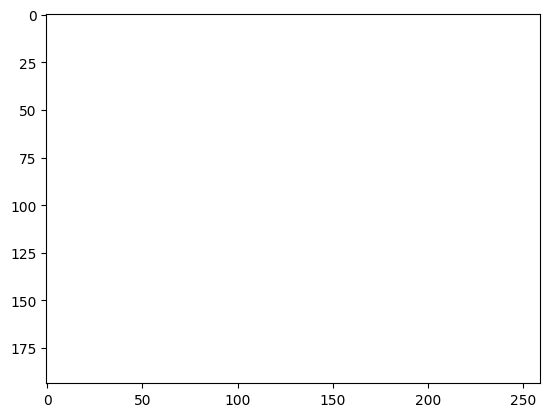

In [11]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('L')
b = nd.binary_dilation(data, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


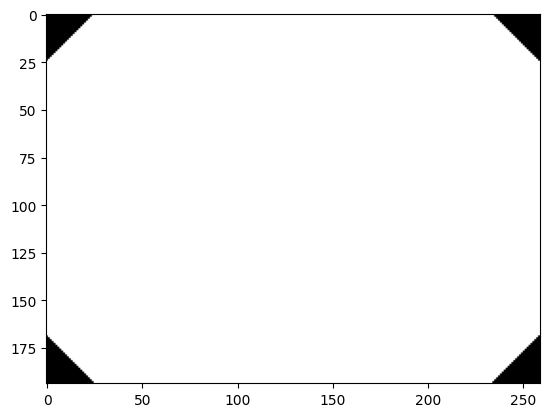

In [13]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local


# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()